# Waiter's tips price prediction- Regression Machine Learning Project

Dataset link:- https://www.kaggle.com/datasets/jsphyg/tipping/download?datasetVersionNumber=1

About Dataset

Context

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips.

Can you predict the tip amount?

Acknowledgements
The data was reported in a collection of case studies for business statistics.

Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

The dataset is also available through the Python package Seaborn.

Usability
10.00

License
Other (specified in description)


Expected update frequency
Never

Tags

Business

Tabular

Regression


In [57]:
#Importing Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv(r'C:\Users\priya\Downloads\Integrify Machine Learning Project\ML Team Project\tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Observations:-

-From the above, we can see that the dataset contains 2 columns with float values

-4 with categorical values and the rest contains integer values.

In [60]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

Attributes:-

    -total_bill:- Total bill in dollars including taxes
    -taxes:- Tip usually given to waiters in dollars
    -sex:-Gender paying the bill (Male or Female)
    -smoker:- whether the person smoked or not
    -day:- Days of the week (from Thursday to Sunday)
    -time:-Lunch or dinner
    -size:-Number of people in a table(from 1-6)
    
    

In [61]:
# Categorical columns to display unique values
categorical_columns = ['sex', 'smoker', 'day', 'time']

# Display unique values in each categorical column using a loop
for column in categorical_columns:
    print(f"Unique values in '{column}' column:", df[column].unique())



Unique values in 'sex' column: ['Female' 'Male']
Unique values in 'smoker' column: ['No' 'Yes']
Unique values in 'day' column: ['Sun' 'Sat' 'Thur' 'Fri']
Unique values in 'time' column: ['Dinner' 'Lunch']


In [62]:
# Check for missing values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


# Descriptive Statistics

In [63]:
df[['total_bill', 'tip']].describe()   #Statistics for Numerical columns

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


# Exploratory Data Analysis

In [95]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

no null values in the given dataset.

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

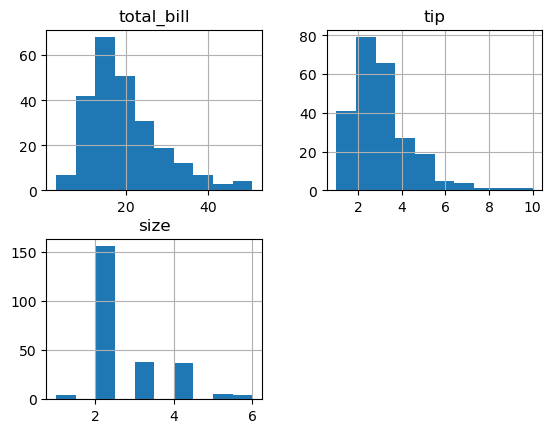

In [64]:
df.hist()

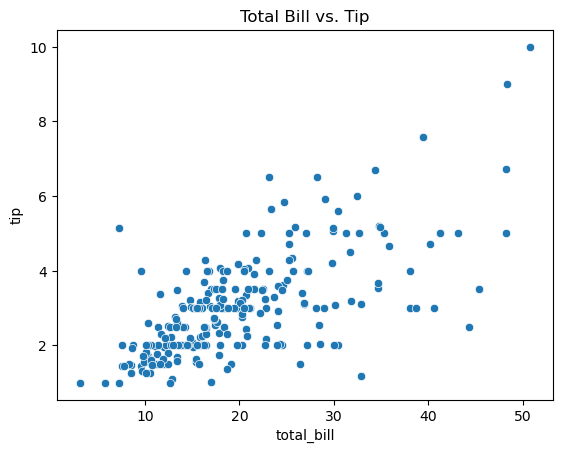

In [65]:
#Visualization of 'total_bill' vs. 'tip'
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs. Tip')
plt.show()

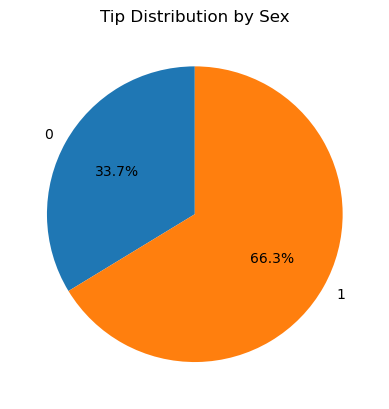

In [96]:
# Visualization for Tip vs Sex
sex_tip = df.groupby('sex')['tip'].sum()
sex_tip.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tip Distribution by Sex')
plt.ylabel('')
plt.show()

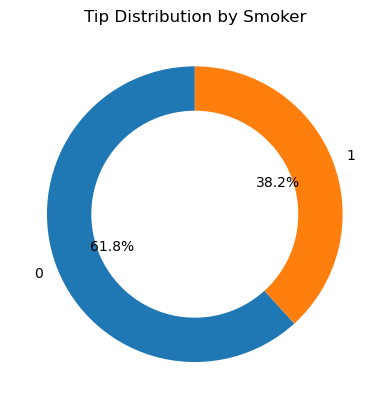

In [97]:
# Visualization for Tip vs Smoker
smoker_tip = df.groupby('smoker')['tip'].sum()
smoker_tip.plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Tip Distribution by Smoker')
plt.ylabel('')
plt.show()

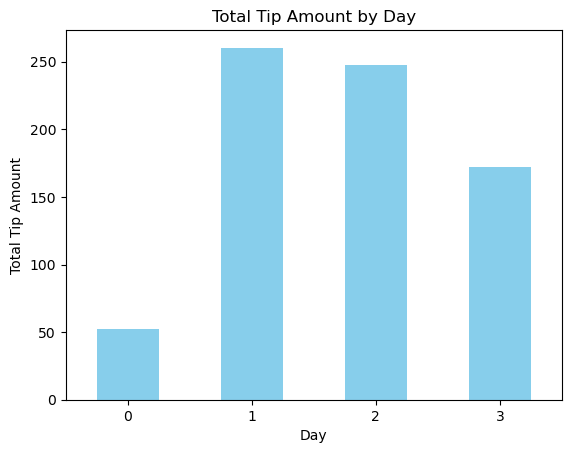

In [98]:
# Visualization for Tip vs Day
day_tip = df.groupby('day')['tip'].sum()
day_tip.plot(kind='bar', color='skyblue')
plt.title('Total Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Total Tip Amount')
plt.xticks(rotation=0)
plt.show()


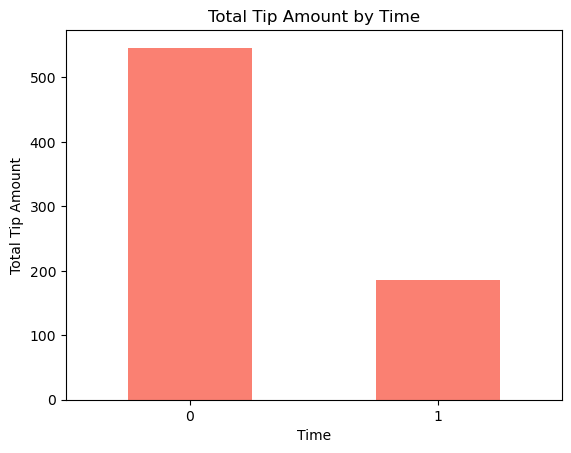

In [99]:
# Bar Chart for Tip vs Time
time_tip = df.groupby('time')['tip'].sum()
time_tip.plot(kind='bar', color='salmon')
plt.title('Total Tip Amount by Time')
plt.xlabel('Time')
plt.ylabel('Total Tip Amount')
plt.xticks(rotation=0)
plt.show()



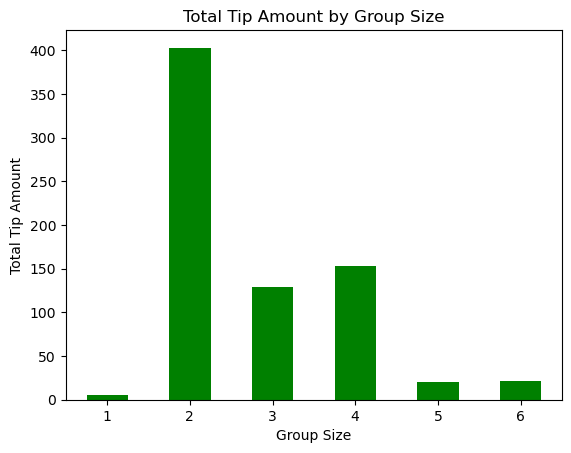

In [100]:
# Bar Chart for Tip vs Size
size_tip = df.groupby('size')['tip'].sum()
size_tip.plot(kind='bar', color='green')
plt.title('Total Tip Amount by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Total Tip Amount')
plt.xticks(rotation=0)
plt.show()

In [101]:
df.groupby(['size']).mean()

,total_bill,tip,sex,smoker,day,time
size,,,,,,
1,7.242500,1.437500,0.250000,0.500000,1.250000,0.500000
2,16.448013,2.582308,0.628205,0.423077,1.762821,0.333333
3,23.277632,3.393158,0.631579,0.315789,1.578947,0.131579
4,28.613514,4.135405,0.756757,0.297297,1.729730,0.135135
5,30.068000,4.028000,0.800000,0.400000,2.000000,0.200000
6,34.830000,5.225000,0.500000,0.000000,2.750000,0.750000


observation:-

we can derive from the above-grouped table that the tip given to the waiter is directly proportional to the number of people who have arrived to dine in.

In [103]:
df.groupby(['time']).mean()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
0,20.797159,3.102670,0.704545,0.397727,1.375000,2.630682
1,17.168676,2.728088,0.485294,0.338235,2.691176,2.411765


observation:-

People who come at dinner time tend to pay more tips as compared to those who came for lunch.

In [104]:
df.groupby(['day']).mean()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
0,17.151579,2.734737,0.526316,0.789474,0.368421,2.105263
1,20.441379,2.993103,0.678161,0.482759,0.000000,2.517241
2,21.410000,3.255132,0.763158,0.250000,0.000000,2.842105
3,17.682742,2.771452,0.483871,0.274194,0.983871,2.451613


Observation:-

one observation can be derived that the tip given on weekends is generally higher than that compared that given on weekdays.

# Data Preprocessing Step

In [72]:
train=df.copy()

In [73]:
#Transforming categorical to numerical variables using Label Encoding
# Encoding categorical variables
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [74]:
df   #Displaying encoding of Categorical to numerical 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


Now all the columns have been converted to numerical form.

plotting a heatmap to analyze the correlation between the variables of the dataset.

# Correlation Matrix :

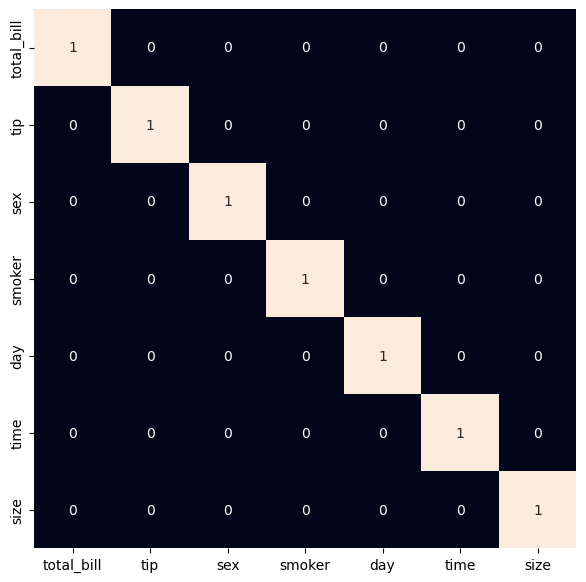

In [108]:
plt.figure(figsize=(7,7)) 
sns.heatmap(df.corr() > 0.7, annot = True, cbar = False) 
plt.show()

Observation:-

From the above heatmap, it is certain that there are no highly correlated features in it.

# Splitting Data 

In [75]:
X = df.drop('tip', axis=1)
y = df['tip']


In [76]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [77]:
# Split the data into train and test sets (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


# Defining models
models = {
    'KNeighborsRegressor_5': KNeighborsRegressor(n_neighbors=5),
    'RandomForestRegressor_100': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoostRegressor_50': AdaBoostRegressor(n_estimators=50, random_state=42),
    'DecisionTreeRegressor_depth5': DecisionTreeRegressor(max_depth=5, random_state=42),
    'GradientBoostingRegressor_100': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR_linear': SVR(kernel='linear'),
    'XGBRegressor_default': XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [80]:
# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}  

In [81]:
# Converting results to a DataFrame for visualization and analysis
# Find the best model based on MAE
results_df = pd.DataFrame(results).T
best_model_name = results_df.idxmin()['MAE']
best_model = models[best_model_name]
best_model_scores = results_df.loc[best_model_name]


In [82]:
# Printing results
print(f"Best Model based on MAE: {best_model_name}")
print("\nModel Evaluation Results:")
print(results_df)
print("\nScores for Best Model:")
print(best_model_scores)

Best Model based on MAE: SVR_linear

Model Evaluation Results:
                                    MAE       MSE        R2
KNeighborsRegressor_5          0.748571  0.809422  0.352448
RandomForestRegressor_100      0.772902  0.962104  0.230299
AdaBoostRegressor_50           0.803839  0.930811  0.255334
DecisionTreeRegressor_depth5   0.718948  0.877415  0.298052
GradientBoostingRegressor_100  0.722072  0.793274  0.365366
SVR_linear                     0.671169  0.688483  0.449201
XGBRegressor_default           0.672170  0.738922  0.408849

Scores for Best Model:
MAE    0.671169
MSE    0.688483
R2     0.449201
Name: SVR_linear, dtype: float64


As we can see from the listed models, SVR with a linear kernel has the lowest MAE (0.671169), MSE (0.688483), and the highest 
R2 Score(0.449201) making it the top-performing model for predicting the waiter's tip.

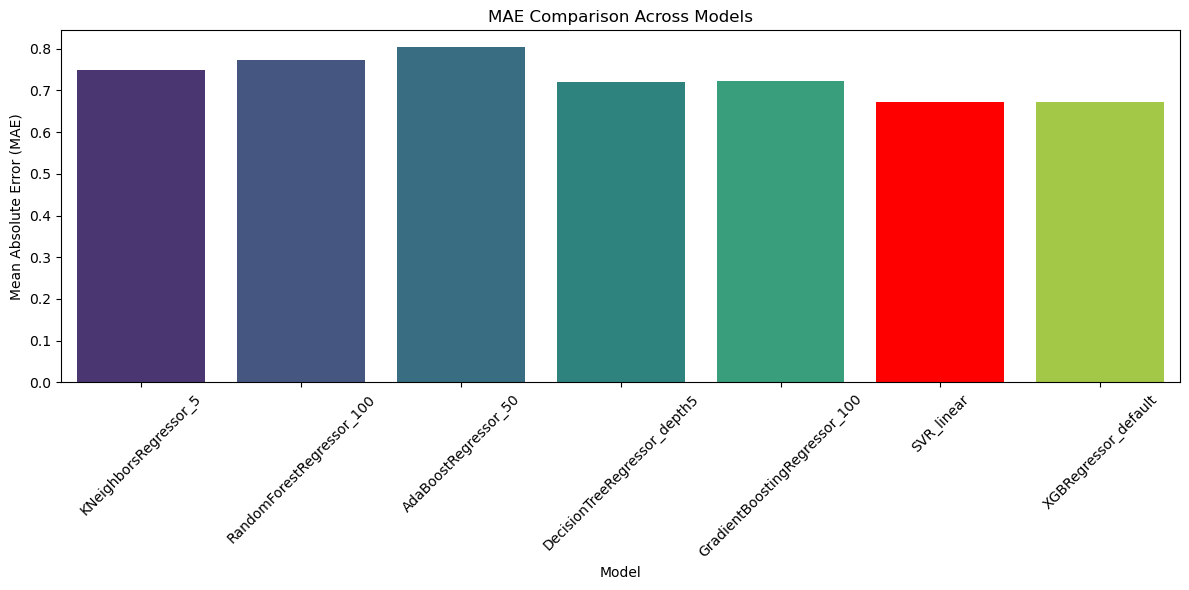

In [83]:
# Plotting MAE values for each model
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=results_df.index, y=results_df['MAE'], palette='viridis')
plt.title('MAE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
best_model_index = results_df.index.get_loc(best_model_name)
barplot.patches[best_model_index].set_facecolor('red')  
plt.tight_layout()
plt.show()

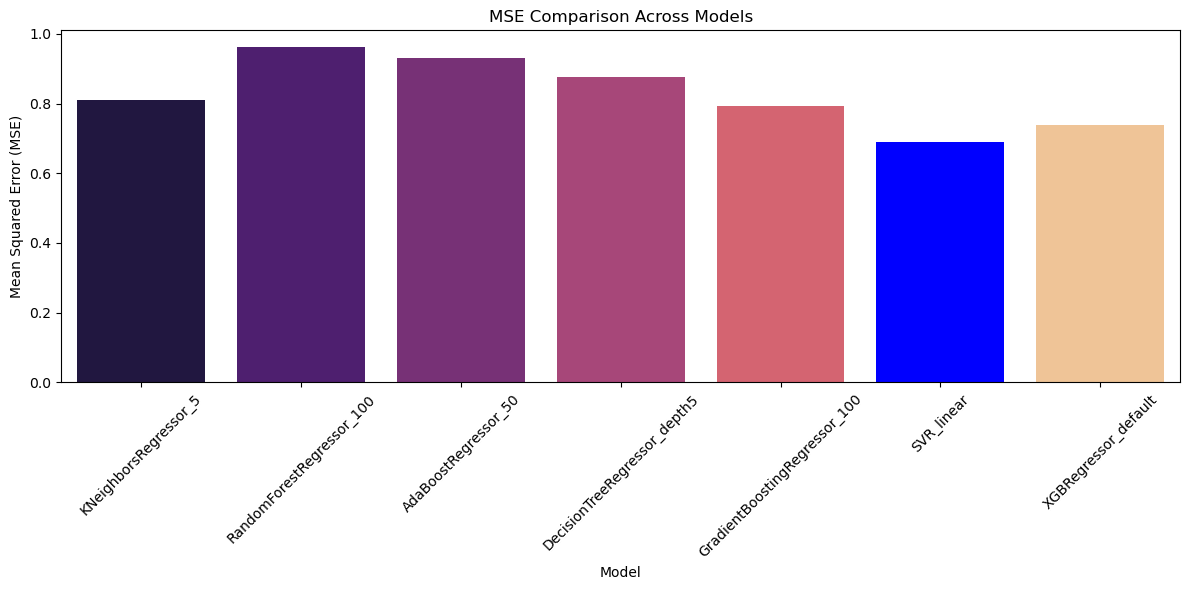

In [84]:
# Plotting MSE values for each model
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['MSE'], palette='magma')
plt.title('MSE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.gca().patches[best_model_index].set_facecolor('blue') 
plt.tight_layout()
plt.show()

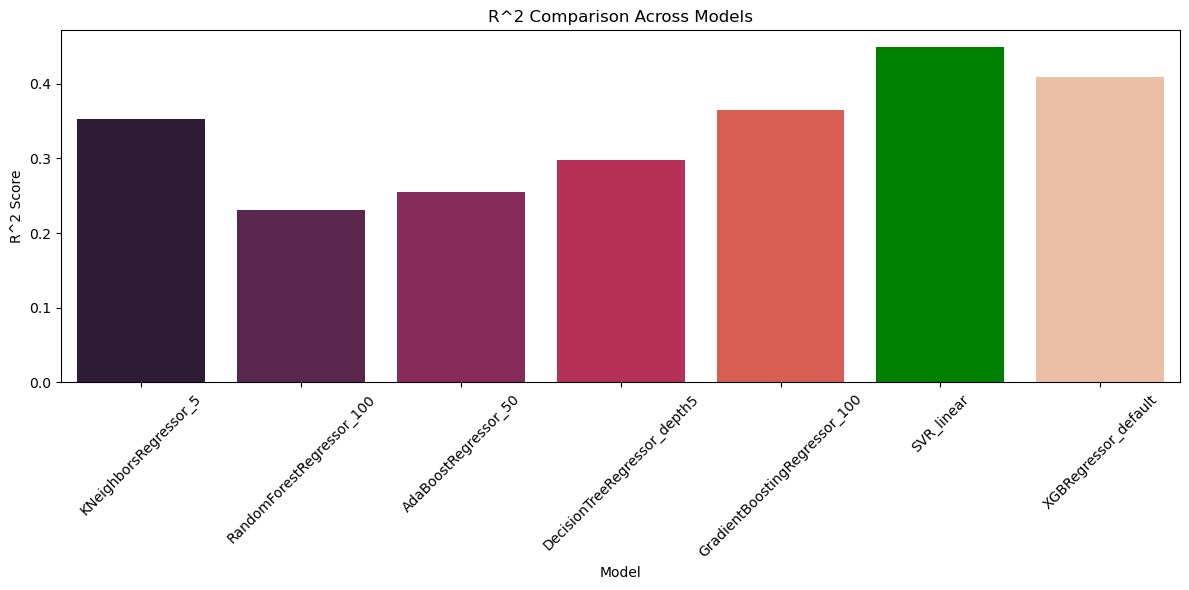

In [85]:
# Plotting R^2 values for each model
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['R2'], palette='rocket')
plt.title('R^2 Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.gca().patches[best_model_index].set_facecolor('green')  
plt.tight_layout()
plt.show()

# Grid Search for Hyperparameter Tuning:

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Define parameter grids for Grid Search
param_grids = {
    'KNeighborsRegressor_5': {'n_neighbors': [3, 5, 7, 9]},
    'RandomForestRegressor_100': {'n_estimators': [50, 100, 150]},
    'AdaBoostRegressor_50': {'n_estimators': [30, 50, 70]},
    'DecisionTreeRegressor_depth5': {'max_depth': [3, 5, 7]},
    'GradientBoostingRegressor_100': {'n_estimators': [50, 100, 150]},
    'SVR_linear': {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
    'XGBRegressor_default': {'n_estimators': [50, 100, 150]}
}

# Initialize results dictionary
results = {}

for name, model in models.items():
    # Define the parameter grid for the current model
    param_grid = param_grids.get(name, {})
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    
    # Fit the GridSearchCV on scaled training data
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate MAE, MSE, and R2 for the best model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results[name] = {'Best Parameters': best_params, 'MAE': mae, 'MSE': mse, 'R2': r2}
    
    # Print the results for the best model
    print(f"Model: {name}")
    print(f"Best Parameters: {best_params}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("------------------------------")


Model: KNeighborsRegressor_5
Best Parameters: {'n_neighbors': 7}
MAE: 0.7407
MSE: 0.7805
R2 Score: 0.3756
------------------------------
Model: RandomForestRegressor_100
Best Parameters: {'n_estimators': 100}
MAE: 0.7729
MSE: 0.9621
R2 Score: 0.2303
------------------------------
Model: AdaBoostRegressor_50
Best Parameters: {'n_estimators': 50}
MAE: 0.8038
MSE: 0.9308
R2 Score: 0.2553
------------------------------
Model: DecisionTreeRegressor_depth5
Best Parameters: {'max_depth': 3}
MAE: 0.6967
MSE: 0.7804
R2 Score: 0.3756
------------------------------
Model: GradientBoostingRegressor_100
Best Parameters: {'n_estimators': 50}
MAE: 0.7108
MSE: 0.8091
R2 Score: 0.3527
------------------------------
Model: SVR_linear
Best Parameters: {'C': 0.1, 'epsilon': 0.01}
MAE: 0.6572
MSE: 0.6520
R2 Score: 0.4784
------------------------------
Model: XGBRegressor_default
Best Parameters: {'n_estimators': 50}
MAE: 0.6689
MSE: 0.7084
R2 Score: 0.4332
------------------------------


Therefor using RandomizedSearchCV & GridSearchCV we can conclude that among the listed models, SVR with a linear kernel that has the lowest MAE , MSE , and the highest R2 Score, making it the top-performing model.

# Visualize Predictions with Regression Line:

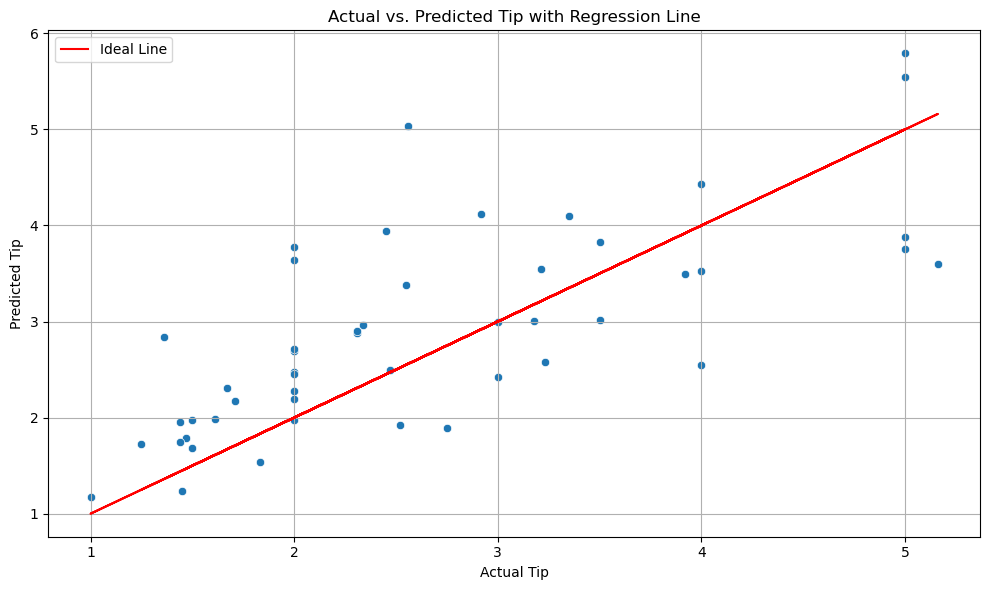

In [109]:
# Visualizing regression line for SVR_linear
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted tips
sns.scatterplot(x=y_test, y=best_model.predict(X_test_scaled))

# Plotting the regression line (y = x line)
plt.plot(y_test, y_test, color='red', label='Ideal Line')  # Regression line

plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual vs. Predicted Tip with Regression Line')
plt.legend()  # Adding a legend to distinguish the scatter plot from the regression line
plt.grid(True)
plt.tight_layout()
plt.show()


# Feature_importance

In [110]:
# Fit the SVR model with best parameters on the entire dataset
best_svr_model = SVR(kernel='linear', C=0.1, epsilon=0.01)  # Using the best parameters found
best_svr_model.fit(X_train_scaled, y_train)

# Extract feature importance
coefficients = best_svr_model.coef_[0]  # Coefficients of the features
feature_importance = abs(coefficients)  # Taking absolute values for importance

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(importance_df)


      Feature  Importance
0  total_bill    0.798374
1        size    0.309388
2         sex    0.059537
3         day    0.057074
4      smoker    0.052837
5        time    0.002667


# Visualization of feature Importance

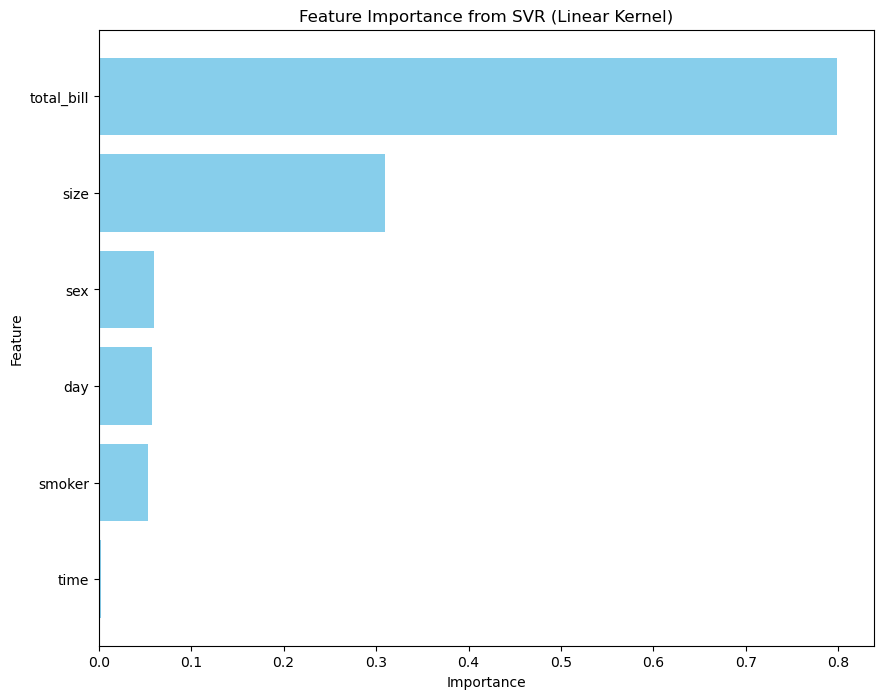

In [111]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from SVR (Linear Kernel)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()
